In [1]:
import pandas as pd  
import numpy as np

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_40387/2170618911.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [8]:
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

In [3]:
marketing = pd.read_csv("Data/marketing_customer_analysis.csv")
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [5]:
marketing.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
marketing.head(3)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


<Axes: xlabel='Response', ylabel='count'>

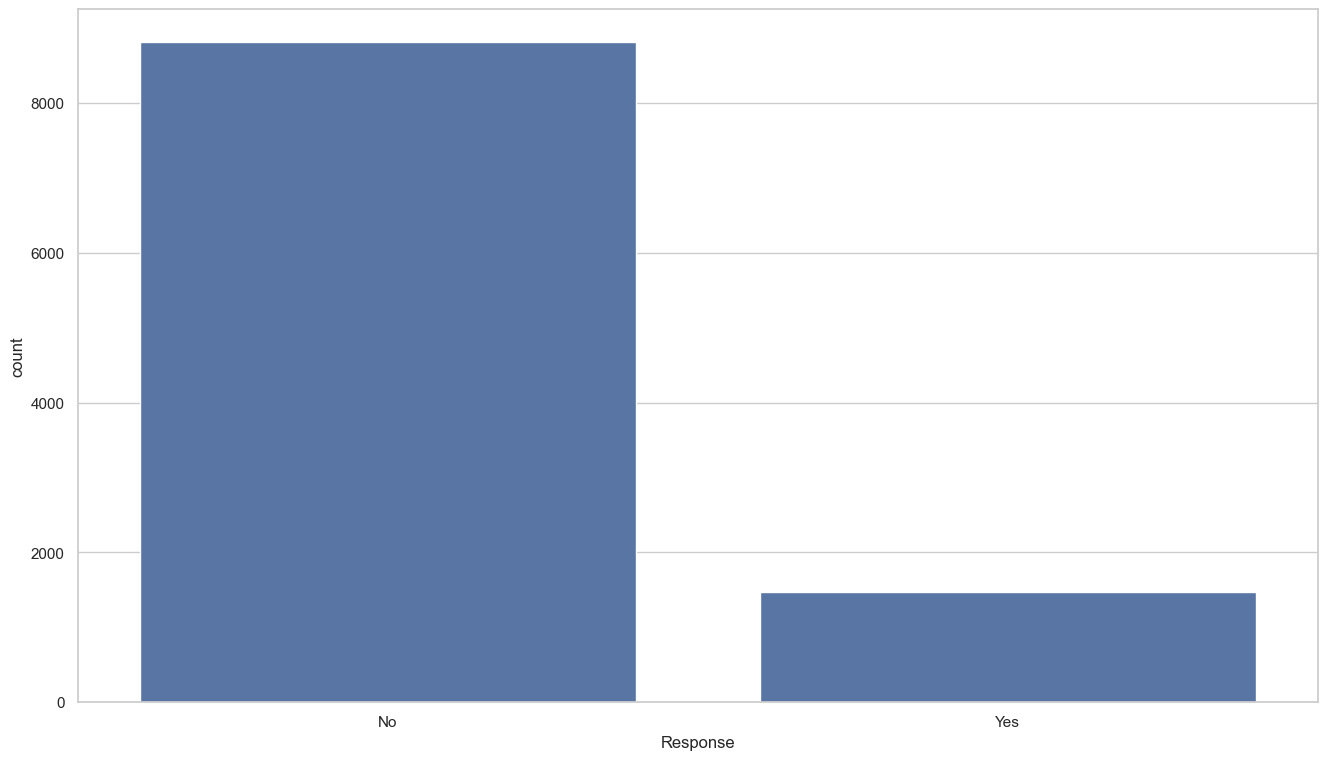

In [19]:
sns.countplot(x='Response', data=marketing)

In [31]:
sales_response_rate = []

for channel in marketing['Sales Channel'].unique():
    # Filter DataFrame for the current sales channel
    channel_data = marketing[marketing['Sales Channel'] == channel]
    sales_count = len (marketing[marketing['Sales Channel'] == channel])

    response_count = channel_data[channel_data['Response'] == 'Yes'].shape[0]
    response_rate = response_count/sales_count
    sales_response_rate.append((channel, response_count, sales_count, response_rate))

# Print the list of tuples (sales channel, count of 'Yes' responses)
print(sales_response_rate)

[('Agent', 742, 4121, 0.1800533851007037), ('Call Center', 221, 2141, 0.10322279308734236), ('Branch', 326, 3022, 0.10787557908669755), ('Web', 177, 1626, 0.1088560885608856)]


In [36]:
sales_df = pd.DataFrame(sales_response_rate, columns=['channel', 'responses', 'total_sales', 'response_rate'])

sales_df

,channel,responses,total_sales,response_rate
0,Agent,742,4121,0.180053
1,Call Center,221,2141,0.103223
2,Branch,326,3022,0.107876
3,Web,177,1626,0.108856


Text(0.5, 1.0, 'Responses rate by sales channel')

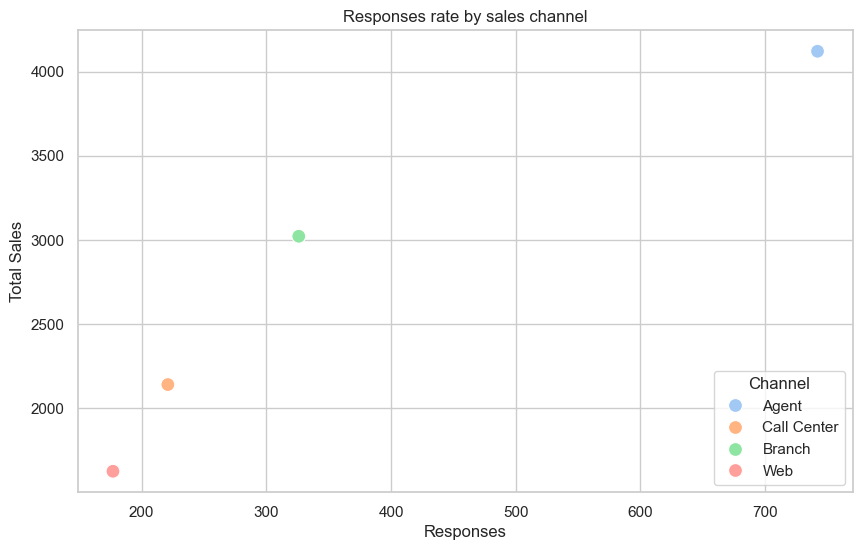

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='responses', y='total_sales', hue='channel', data=sales_df, palette='pastel', s=100)

# Add a legend
plt.legend(title='Channel', loc='lower right')

# Set labels and title
plt.xlabel('Responses')
plt.ylabel('Total Sales')
plt.title('Responses rate by sales channel')

In [53]:
num_response = []
for i in marketing['Response']:
    if i == 'Yes':
        num_response.append(1)
    else:
        num_response.append(0)

In [54]:
marketing['num_response'] = num_response

In [58]:
marketing[["num_response", "Total Claim Amount"]].corr(method="spearman")

,num_response,Total Claim Amount
num_response,1.000000,0.049938
Total Claim Amount,0.049938,1.000000


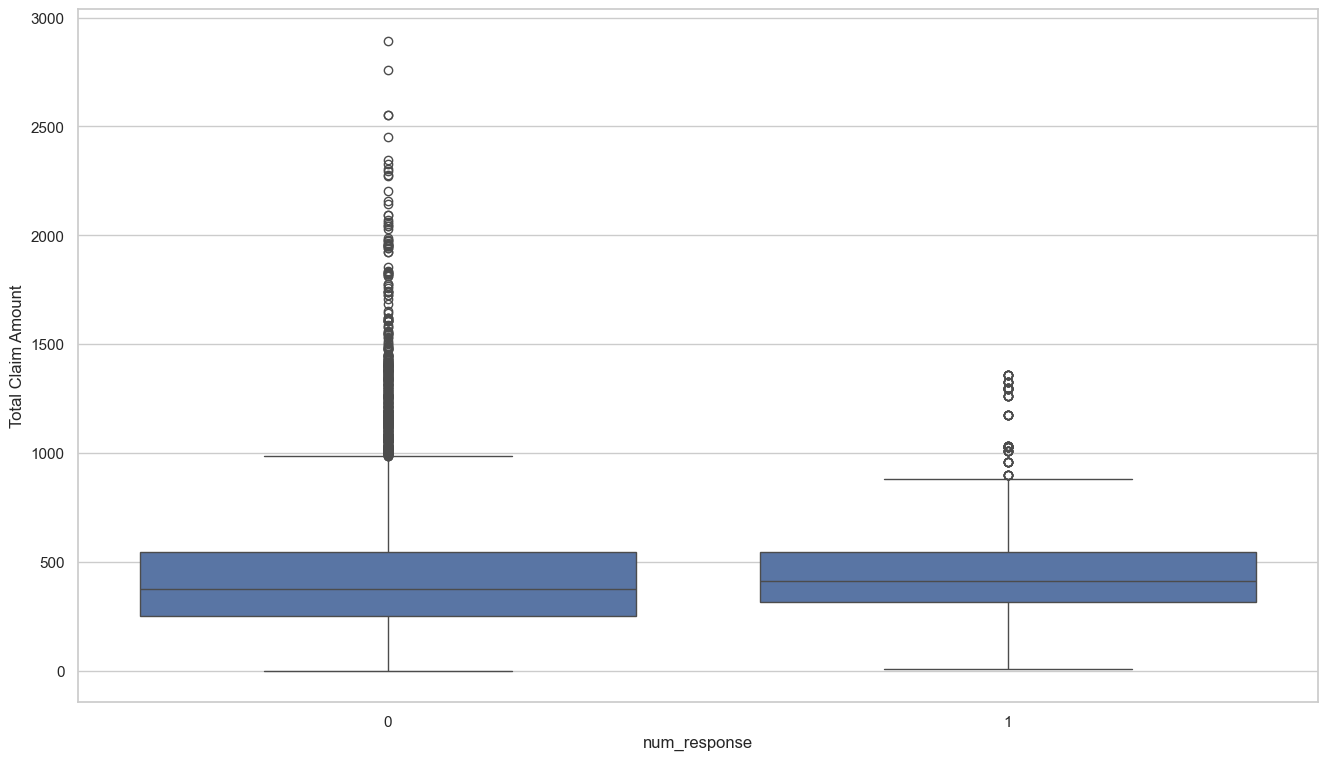

In [61]:
sns.boxplot(x=marketing['num_response'], y=marketing['Total Claim Amount']);

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_40387/1481714033.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='num_response', y='Total Claim Amount', data=marketing, palette='pastel', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Responses rate and claims')

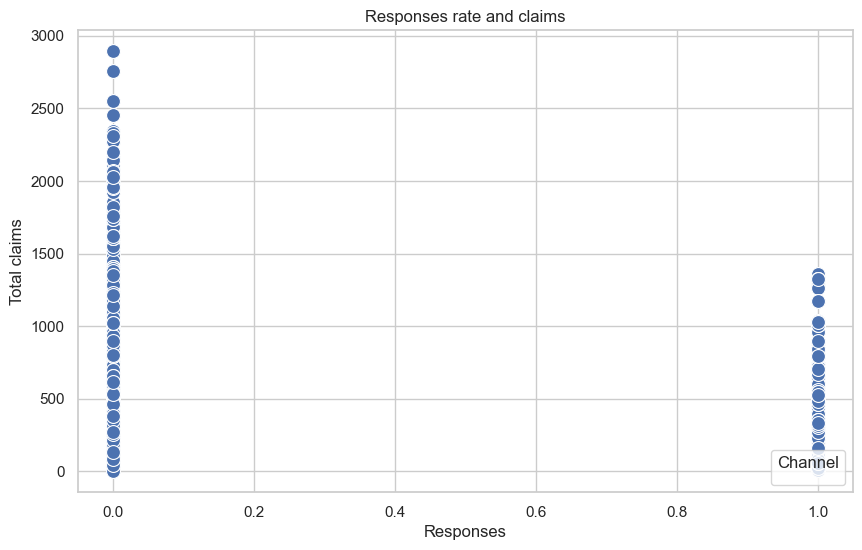

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_response', y='Total Claim Amount', data=marketing, palette='pastel', s=100)

# Add a legend
plt.legend(title='Channel', loc='lower right')

# Set labels and title
plt.xlabel('Responses')
plt.ylabel('Total claims')
plt.title('Responses rate and claims')

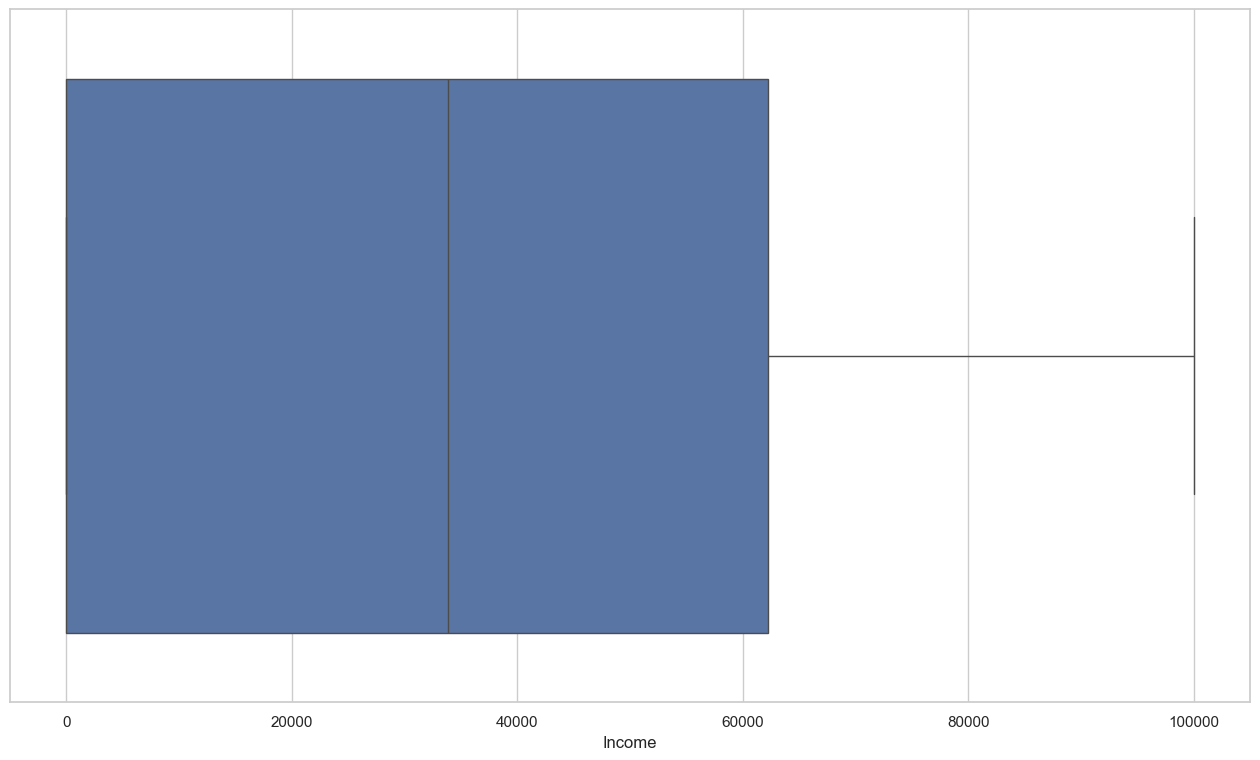

In [64]:
sns.boxplot(x=marketing['Income']);

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_40387/1619588802.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='num_response', y='Income', data=marketing, palette='pastel', s=100)


Text(0.5, 1.0, 'Responses rate by income')

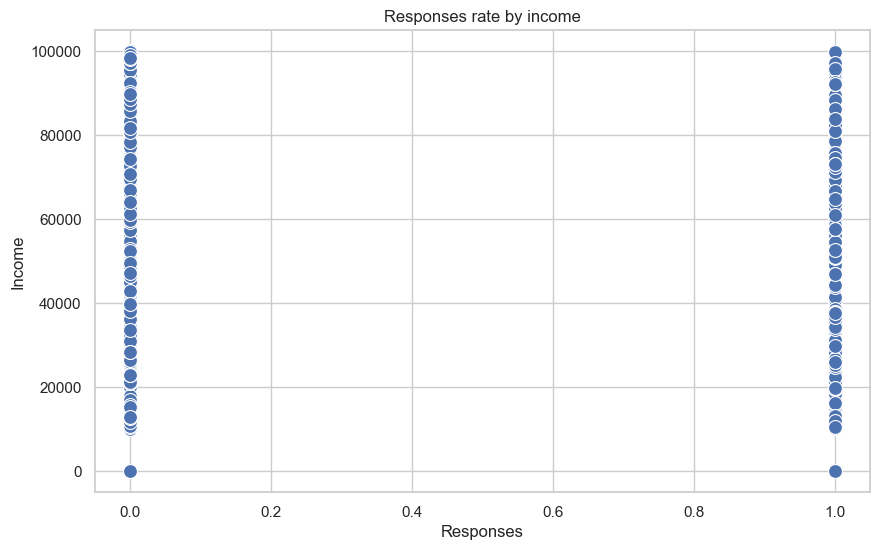

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_response', y='Income', data=marketing, palette='pastel', s=100)


# Set labels and title
plt.xlabel('Responses')
plt.ylabel('Income')
plt.title('Responses rate by income')

In [78]:
marketing.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [79]:
numerical = marketing._get_numeric_data()

In [81]:
numerical.head(3)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,num_response
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,0
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,0
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0


In [83]:
categoricals = marketing.select_dtypes('object')

In [84]:
categoricals.head(3)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A


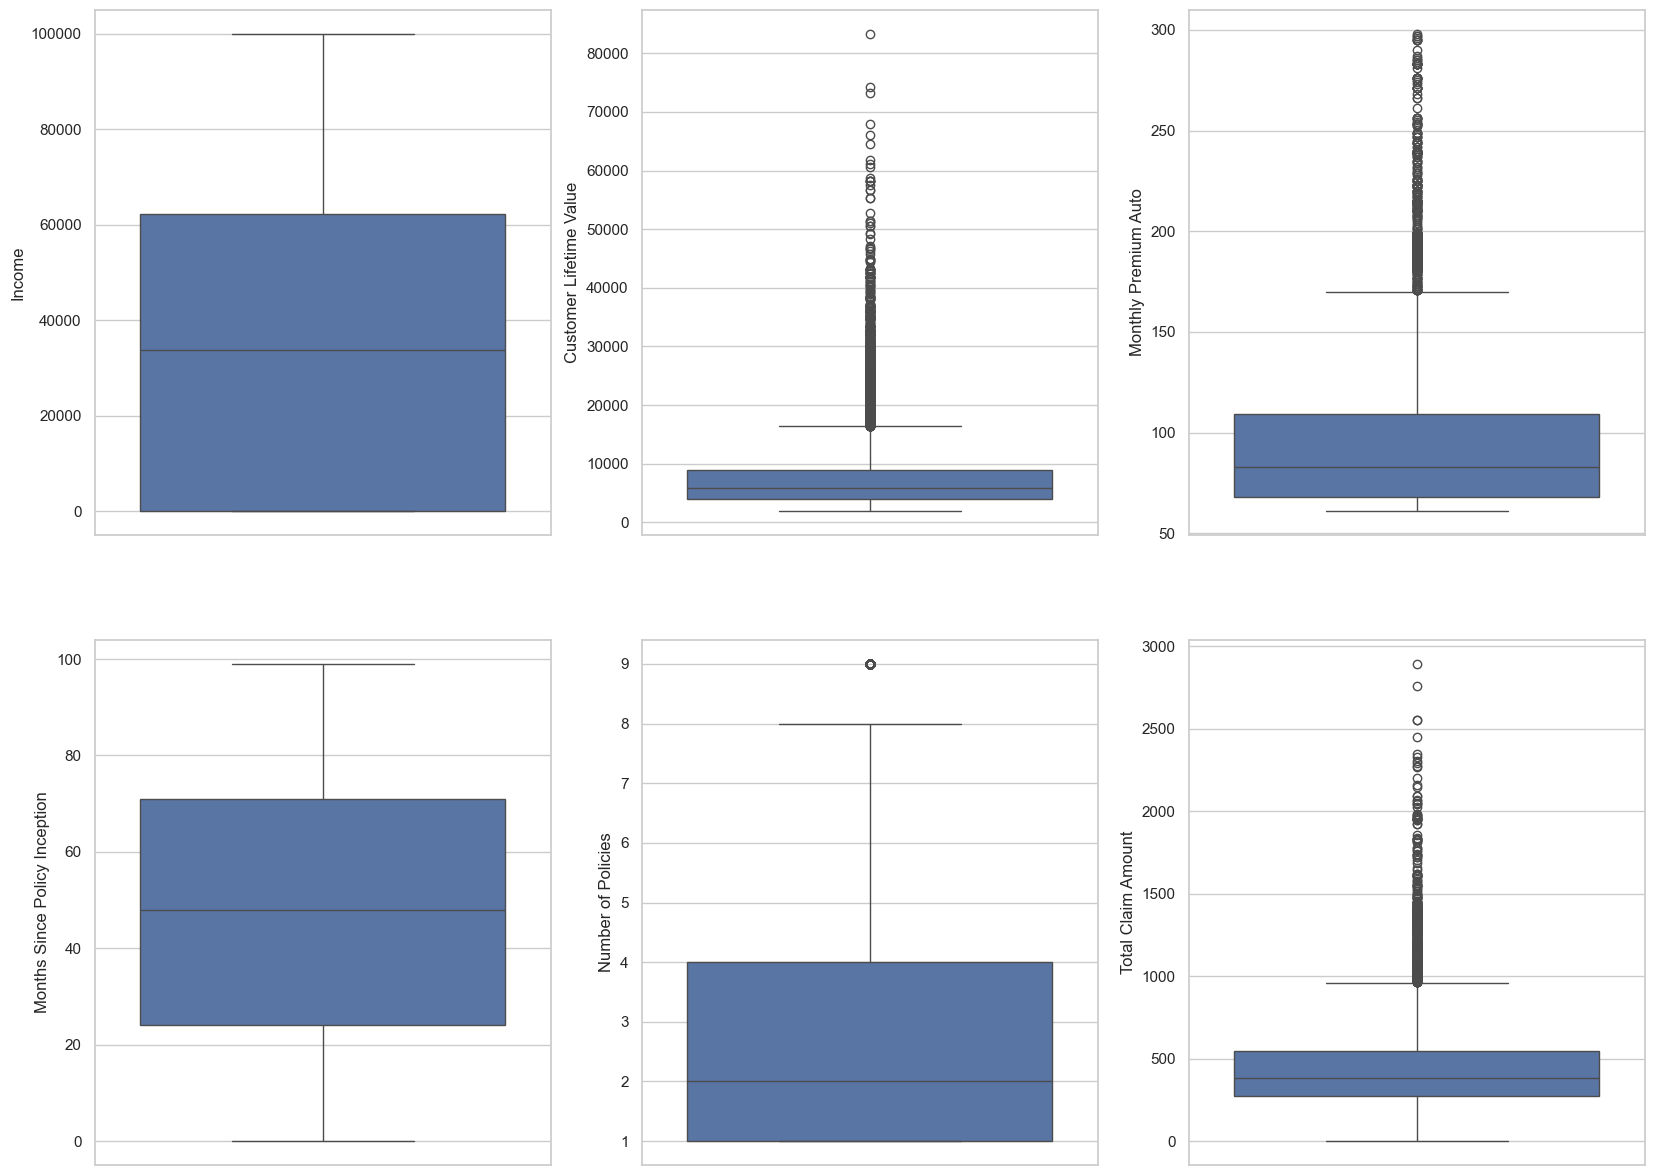

In [107]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
sns.boxplot(numerical.Income,  ax=axs[0,0]);
sns.boxplot(numerical['Customer Lifetime Value'], ax=axs[0,1]);
sns.boxplot(numerical['Monthly Premium Auto'], ax=axs[0,2]);
sns.boxplot(numerical['Months Since Policy Inception'], ax=axs[1,0]);
#sns.boxplot(numerical['Number of Open Complaints'], ax=axs[1,1]);
sns.boxplot(numerical['Number of Policies'], ax=axs[1,1]);
sns.boxplot(numerical['Total Claim Amount'], ax=axs[1,2]);

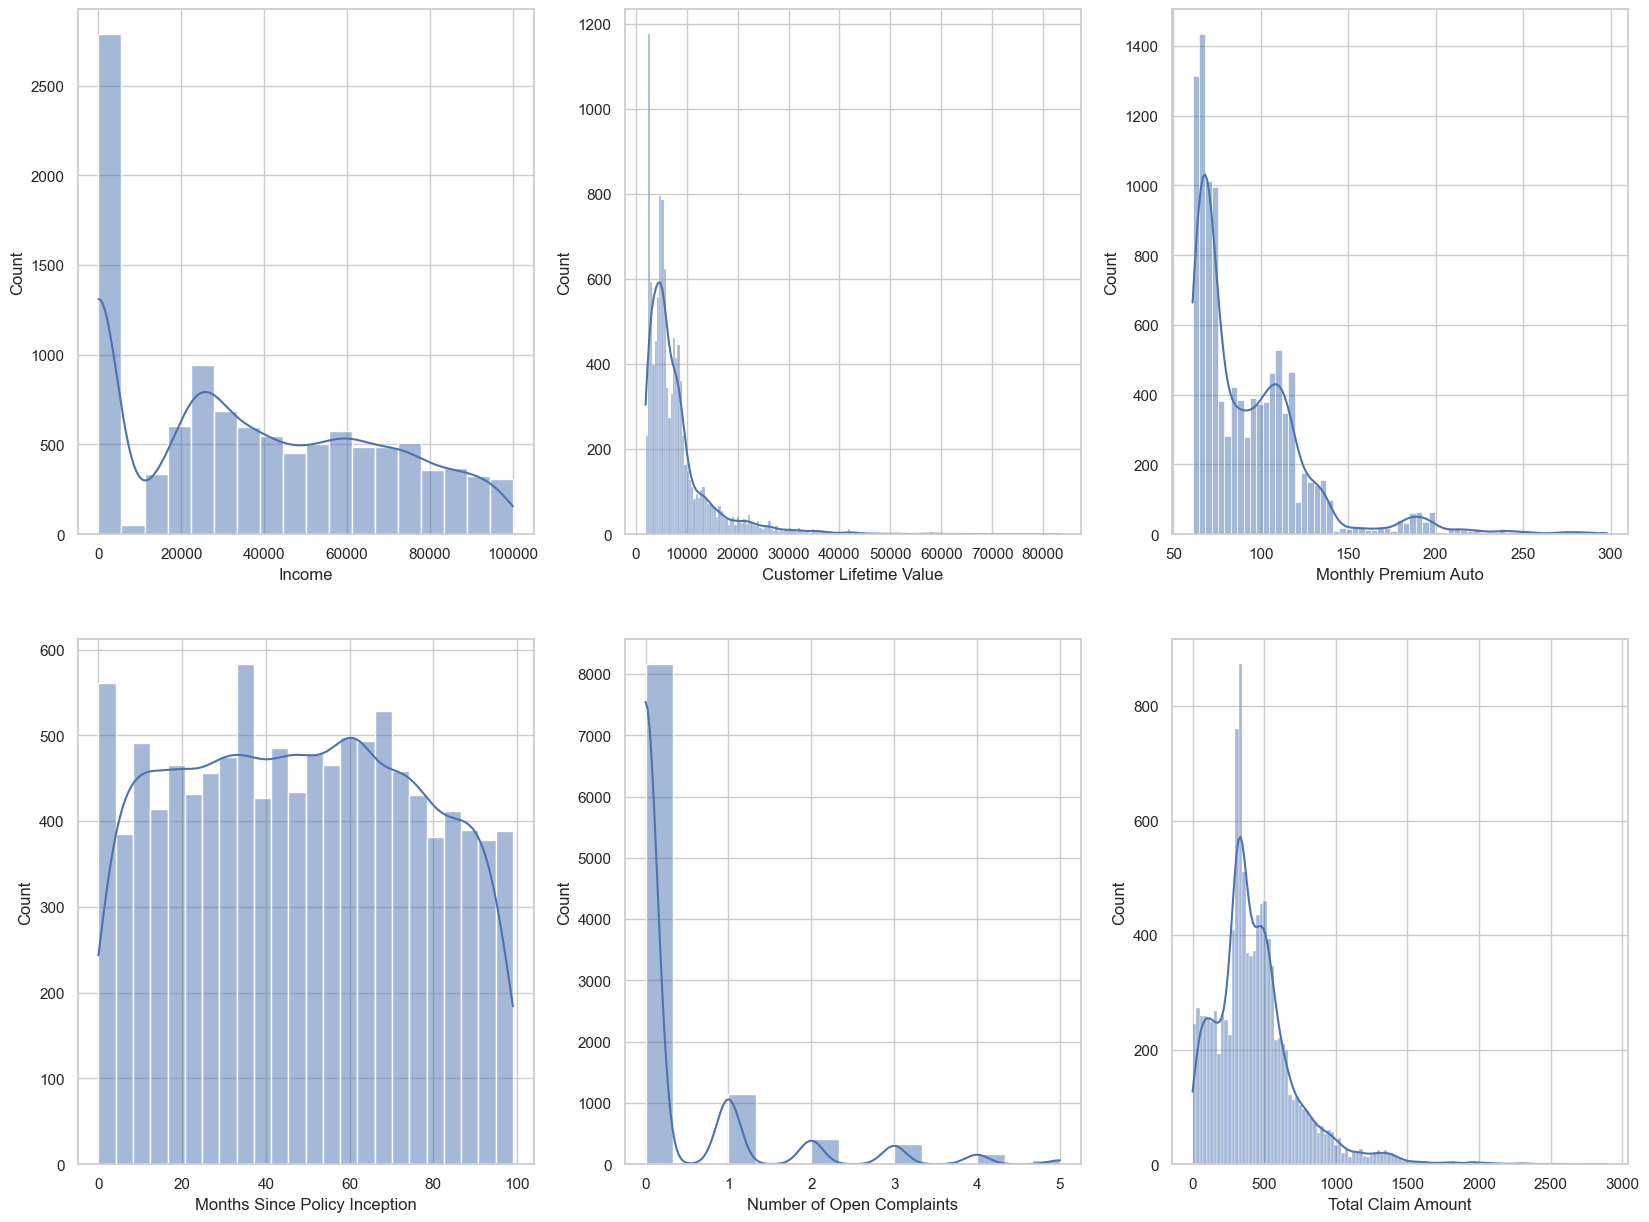

In [101]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
sns.histplot(numerical.Income, kde=True,  ax=axs[0,0]);
sns.histplot(numerical['Customer Lifetime Value'], kde=True, ax=axs[0,1]);
sns.histplot(numerical['Monthly Premium Auto'], kde=True, ax=axs[0,2]);
sns.histplot(numerical['Months Since Policy Inception'], kde=True, ax=axs[1,0]);
sns.histplot(numerical['Number of Open Complaints'], kde=True, ax=axs[1,1]);
sns.histplot(numerical['Total Claim Amount'], kde=True, ax=axs[1,2]);

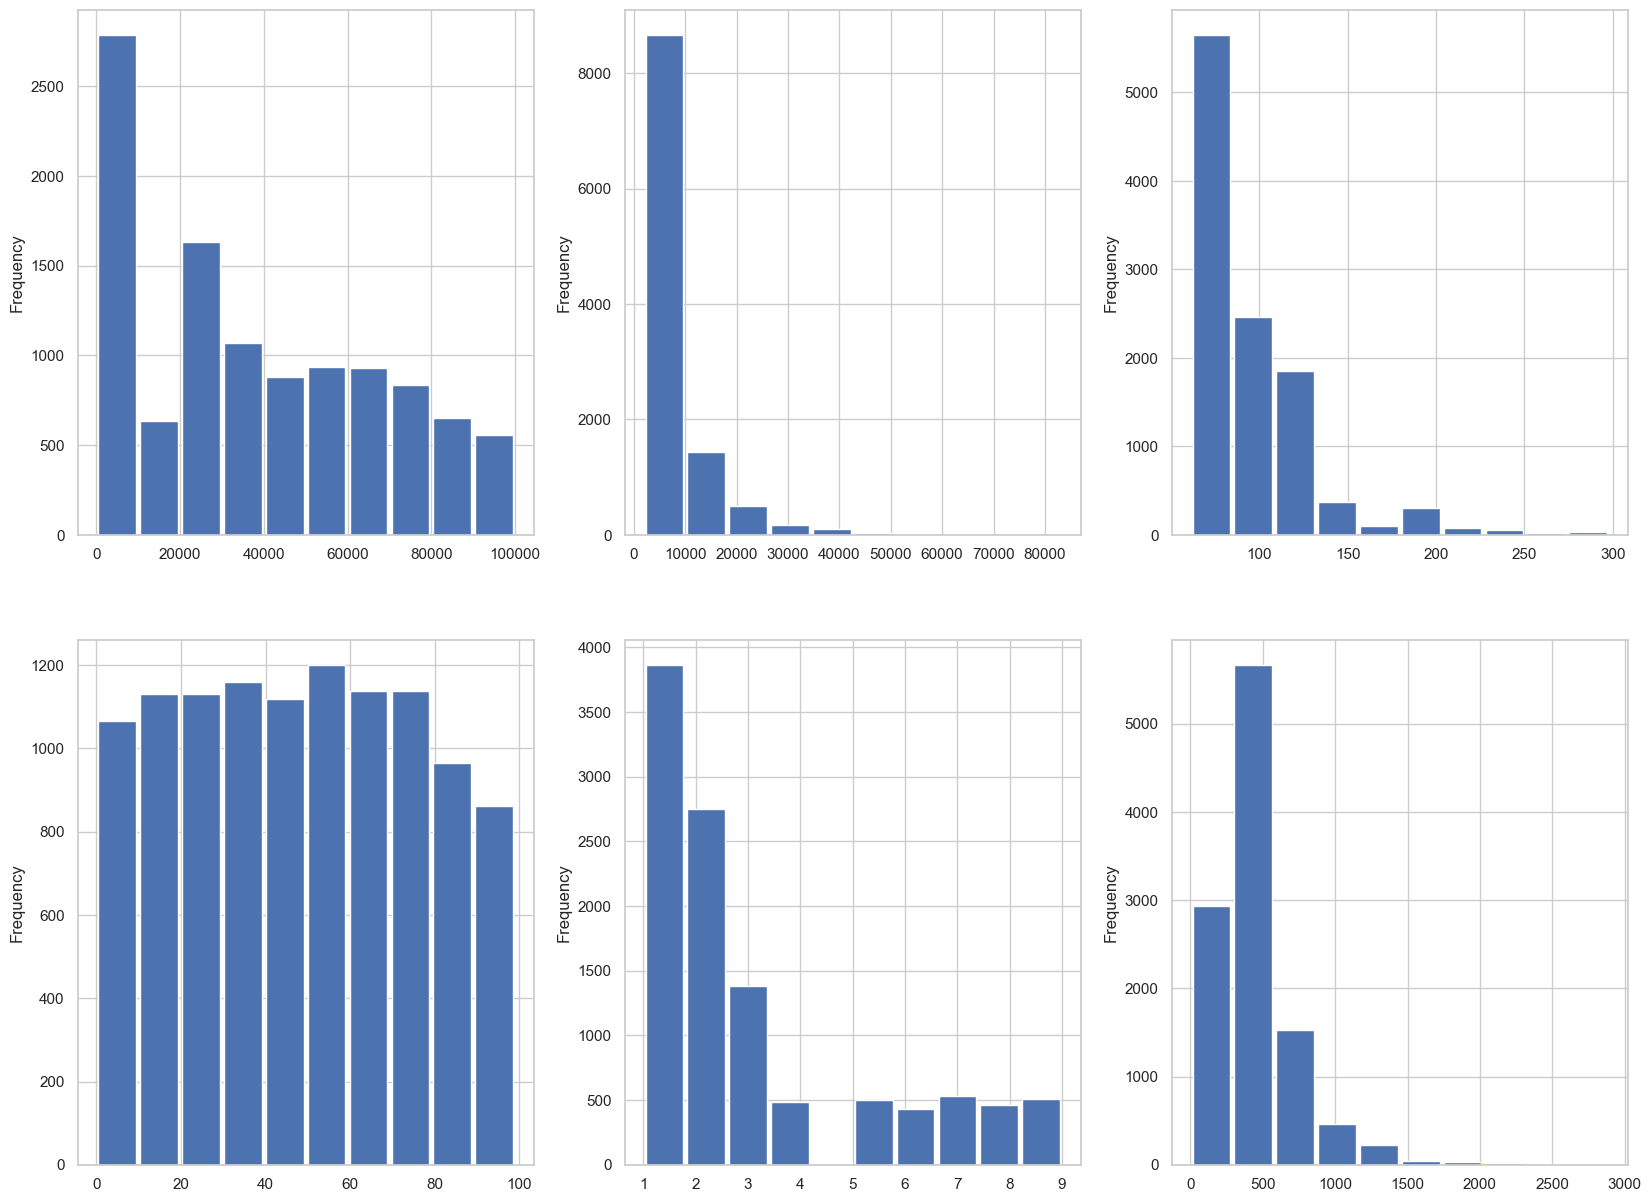

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
numerical.Income.plot.hist(bins=10,rwidth=0.90, ax=axs[0,0]);
numerical['Customer Lifetime Value'].plot.hist(bins=10,rwidth=0.90, ax=axs[0,1]);
numerical['Monthly Premium Auto'].plot.hist(bins=10,rwidth=0.90, ax=axs[0,2]);
numerical['Months Since Policy Inception'].plot.hist(bins=10,rwidth=0.90, ax=axs[1,0]);
#sns.boxplot(numerical['Number of Open Complaints'], ax=axs[1,1]);
numerical['Number of Policies'].plot.hist(bins=10,rwidth=0.90, ax=axs[1,1]);
numerical['Total Claim Amount'].plot.hist(bins=10,rwidth=0.90, ax=axs[1,2]);

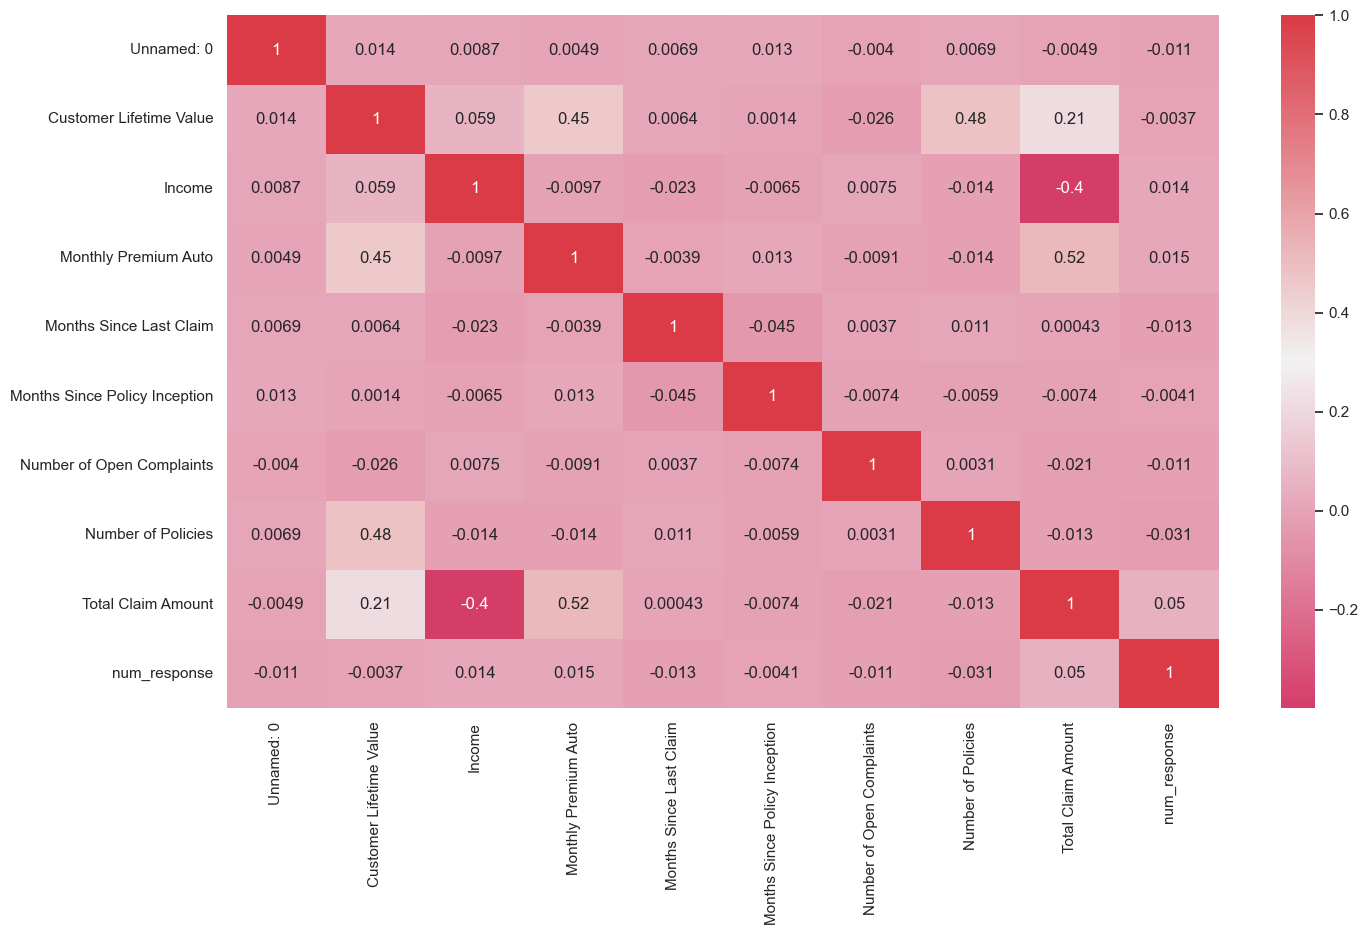

In [102]:
corr = numerical.corr(method = 'spearman')
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,cmap=color_map, annot = True)
plt.show() # won't account for non-linear relations

In [112]:
def corr_drop(corr_matrix, threshold=0.9):
    # Create a copy of the correlation matrix
    corr_matrix_copy = corr_matrix.copy()
    
    # Iterate through the upper triangle of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # Drop the column with higher correlation
                col_to_drop = corr_matrix.columns[j]
                corr_matrix_copy.drop(columns=col_to_drop, inplace=True)
    
    return corr_matrix_copy

In [123]:
corr.head(3)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,num_response
Unnamed: 0,1.000000,0.013873,0.008661,0.004918,0.006898,0.012922,-0.003987,0.006852,-0.004884,-0.010615
Customer Lifetime Value,0.013873,1.000000,0.058577,0.454289,0.006398,0.001445,-0.026373,0.483307,0.213352,-0.003684
Income,0.008661,0.058577,1.000000,-0.009749,-0.023102,-0.006549,0.007458,-0.013528,-0.399412,0.014154


In [117]:
def corr_drop(corr_matrix, threshold=0.9):

    corr_matrix_copy = corr_matrix.copy() # Create a copy of the correlation matrix
    for i in corr_matrix.columns:
        for j in corr_matrix.index:
            if i != j:
                if abs(corr_matrix.loc[i, j]) > threshold:
                    # Drop one variable with high correlation
                    if i in corr_matrix_copy.columns:
                        corr_matrix_copy.drop(columns=i, inplace=True)
                    elif j in corr_matrix_copy.index:
                        corr_matrix_copy.drop(index=j, inplace=True)
    
    return corr_matrix_copy

In [118]:
corr_drop(corr, threshold=0.9)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,num_response
Unnamed: 0,1.000000,0.013873,0.008661,0.004918,0.006898,0.012922,-0.003987,0.006852,-0.004884,-0.010615
Customer Lifetime Value,0.013873,1.000000,0.058577,0.454289,0.006398,0.001445,-0.026373,0.483307,0.213352,-0.003684
Income,0.008661,0.058577,1.000000,-0.009749,-0.023102,-0.006549,0.007458,-0.013528,-0.399412,0.014154
Monthly Premium Auto,0.004918,0.454289,-0.009749,1.000000,-0.003896,0.012536,-0.009123,-0.013975,0.522180,0.015434
Months Since Last Claim,0.006898,0.006398,-0.023102,-0.003896,1.000000,-0.044703,0.003674,0.010520,0.000430,-0.013336
Months Since Policy Inception,0.012922,0.001445,-0.006549,0.012536,-0.044703,1.000000,-0.007401,-0.005929,-0.007351,-0.004127
Number of Open Complaints,-0.003987,-0.026373,0.007458,-0.009123,0.003674,-0.007401,1.000000,0.003124,-0.020999,-0.011417
Number of Policies,0.006852,0.483307,-0.013528,-0.013975,0.010520,-0.005929,0.003124,1.000000,-0.013149,-0.030579
Total Claim Amount,-0.004884,0.213352,-0.399412,0.522180,0.000430,-0.007351,-0.020999,-0.013149,1.000000,0.049938
num_response,-0.010615,-0.003684,0.014154,0.015434,-0.013336,-0.004127,-0.011417,-0.030579,0.049938,1.000000


In [122]:
corr_drop(corr, threshold=0.3) # dropping features with a higher 0.3 correlation

,Unnamed: 0,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,num_response
Unnamed: 0,1.000000,0.006898,0.012922,-0.003987,-0.010615
Customer Lifetime Value,0.013873,0.006398,0.001445,-0.026373,-0.003684
Income,0.008661,-0.023102,-0.006549,0.007458,0.014154
Months Since Last Claim,0.006898,1.000000,-0.044703,0.003674,-0.013336
Months Since Policy Inception,0.012922,-0.044703,1.000000,-0.007401,-0.004127
Number of Open Complaints,-0.003987,0.003674,-0.007401,1.000000,-0.011417
num_response,-0.010615,-0.013336,-0.004127,-0.011417,1.000000
